# 🏡 Airbnb Data Analysis
---

## 📘 Project Overview
This project focuses on cleaning, preprocessing, and preparing the **Airbnb Listings Dataset** for data analysis and modeling.  
It includes data exploration, handling missing values, feature engineering, and validation to ensure high-quality inputs for analytical or predictive tasks.

---

## 📂 Dataset Information
The **Airbnb Listings Dataset** contains detailed information about property listings, hosts, pricing, and availability across various geographic locations.  
It serves as a foundational dataset for **data exploration**, **feature engineering**, and **market insights**.

---

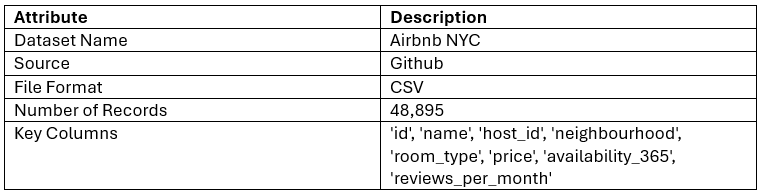

---

## 🎯 Project Objectives
- Clean and preprocess the dataset to handle inconsistencies and missing values.  
- Engineer meaningful features to improve data usability for analysis and modeling.  
- Visualize data to extract insights and identify market trends.  
- Prepare a high-quality dataset ready for machine learning applications.  

---

## 🧰 Tools & Libraries
- **Programming Language:** Python  
- **Data Manipulation:** Pandas, NumPy  
- **Data Visualization:** Matplotlib, Seaborn
- **Database Connectivity:** SQLAlchemy, urllib
- **Environment Management:** dotenv, os
- **Development Environment:** Jupyter Notebook  

---

## ⚙️ Methodology
1. **Import Libraries** – Load essential Python packages for analysis.  
2. **Load Dataset** – Import dataset from a reliable source.  
3. **Data Exploration** – Understand data distribution, patterns, and anomalies.  
4. **Data Cleaning** – Handle missing values, duplicates, and inconsistent data.  
5. **Feature Engineering** – Create or modify features for better interpretability.  
6. **Export Clean Dataset** – Save processed data for future use or modeling.

---

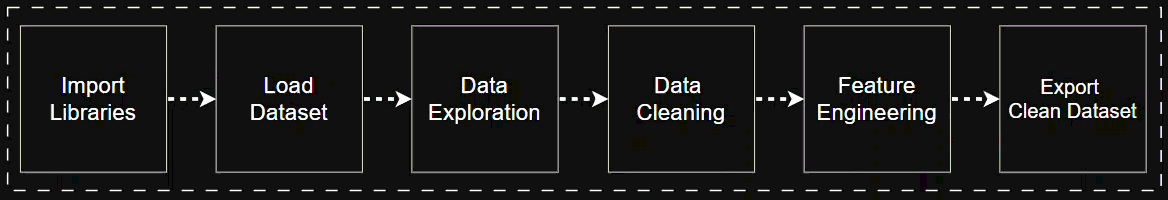

---

## 📊 Results Summary
- ✅ **Data Cleaning:** The dataset was successfully cleaned and validated, ensuring consistency and reliability.  
- 🔧 **Missing Values:** Missing entries were handled effectively using appropriate imputation and removal strategies.  
- 🧩 **Feature Engineering:** New and modified features enhanced interpretability and analytical value.  
- 📈 **Data Readiness:** The processed dataset is now well-structured and ready for exploratory analysis or predictive modeling.  
- 💾 **Export:** A clean, high-quality dataset was exported for downstream analytics or machine learning workflows.  

---



## Import Libraries


In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import os
from sqlalchemy import create_engine
import urllib.parse
from dotenv import load_dotenv

## Load the Dataset

In [42]:
data = 'https://github.com/arsudsandesh97/airbnb-end-to-end-analysis/raw/refs/heads/main/airbnb%20data.csv'

In [43]:
df = pd.read_csv(data)

## Data Exploration

In [44]:
df.shape

(39703, 22)

In [45]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,...,last_review,reviews_per_month,calculated_host_listings_count,availability_365,review_year,review_month,price_category,host_type,reviews_per_year,monthly_availability
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,...,2018-10-19 00:00:00,0.21,6,365,2018,10,Standard,Superhost,2.52,30.42
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,...,2019-05-21 00:00:00,0.38,2,355,2019,5,Premium,Individual,4.56,29.58
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,...,2019-07-08 00:00:00,0.00,1,365,2019,7,Standard,Individual,0.00,30.42
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,...,2019-07-05 00:00:00,4.64,1,194,2019,7,Standard,Individual,55.68,16.17
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,...,2018-11-19 00:00:00,0.10,1,0,2018,11,Standard,Individual,1.20,0.00


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39703 entries, 0 to 39702
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              39703 non-null  int64  
 1   name                            39703 non-null  object 
 2   host_id                         39703 non-null  int64  
 3   host_name                       39703 non-null  object 
 4   neighbourhood_group             39703 non-null  object 
 5   neighbourhood                   39703 non-null  object 
 6   latitude                        39703 non-null  float64
 7   longitude                       39703 non-null  float64
 8   room_type                       39703 non-null  object 
 9   price                           39703 non-null  int64  
 10  minimum_nights                  39703 non-null  int64  
 11  number_of_reviews               39703 non-null  int64  
 12  last_review                     

In [47]:
df.columns.to_list()

['id',
 'name',
 'host_id',
 'host_name',
 'neighbourhood_group',
 'neighbourhood',
 'latitude',
 'longitude',
 'room_type',
 'price',
 'minimum_nights',
 'number_of_reviews',
 'last_review',
 'reviews_per_month',
 'calculated_host_listings_count',
 'availability_365',
 'review_year',
 'review_month',
 'price_category',
 'host_type',
 'reviews_per_year',
 'monthly_availability']

In [48]:
df.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
review_year                       0
review_month                      0
price_category                    0
host_type                         0
reviews_per_year                  0
monthly_availability              0
dtype: int64

In [49]:
for column in df.columns:
    null_percent = (df[column].isnull().sum() / len(df)) * 100
    print(f"{column}: {null_percent:.2f}% null values")

id: 0.00% null values
name: 0.00% null values
host_id: 0.00% null values
host_name: 0.00% null values
neighbourhood_group: 0.00% null values
neighbourhood: 0.00% null values
latitude: 0.00% null values
longitude: 0.00% null values
room_type: 0.00% null values
price: 0.00% null values
minimum_nights: 0.00% null values
number_of_reviews: 0.00% null values
last_review: 0.00% null values
reviews_per_month: 0.00% null values
calculated_host_listings_count: 0.00% null values
availability_365: 0.00% null values
review_year: 0.00% null values
review_month: 0.00% null values
price_category: 0.00% null values
host_type: 0.00% null values
reviews_per_year: 0.00% null values
monthly_availability: 0.00% null values


## Data Cleaning

In [50]:
# We have 0 values in price which is not possible. So we will fill those rows with minimum value.

# Find the minimum non-zero price
min_price = df.loc[df['price'] != 0, 'price'].min()

# Replace zero values with that minimum price
df['price'] = df['price'].replace(0, min_price)

In [51]:
# since we have very low percent of missing values in name that is 0.03% and host_name that is 0.04% so we will drop these rows

df.dropna(subset=['name', 'host_name'], inplace=True)

In [52]:
# our last_review column has object datatype so we need to convert in datetime because it contains date information

df['last_review'] = pd.to_datetime(df['last_review'], errors='coerce')

In [53]:
# Find the most recent review date in your dataset
max_date = df['last_review'].max()

# Fill missing values with that date
df['last_review'] = df['last_review'].fillna(max_date)

In [54]:
# we will fill nulls of reviews_per_month with 0

df['reviews_per_month'] = df['reviews_per_month'].fillna(0)

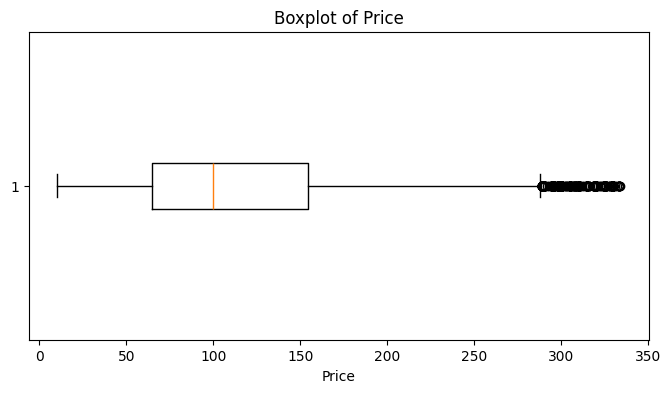

In [55]:
# lets check outliers

plt.figure(figsize=(8, 4))
plt.boxplot(df['price'], vert=False)
plt.title('Boxplot of Price')
plt.xlabel('Price')
plt.show()

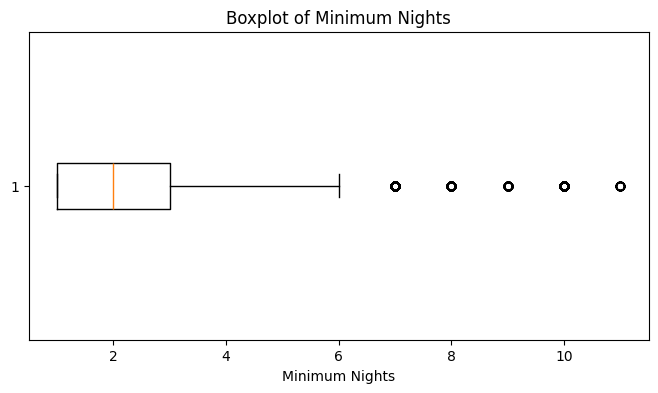

In [56]:
plt.figure(figsize=(8, 4))
plt.boxplot(df['minimum_nights'], vert=False)
plt.title('Boxplot of Minimum Nights')
plt.xlabel('Minimum Nights')
plt.show()

In [57]:
# fix outliers

def handle_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

    # Filter data within the limits
    df_no_outliers = df[(df[column] >= lower_limit) & (df[column] <= upper_limit)]

    return df_no_outliers

In [58]:
df = handle_outliers(df, 'price')

In [59]:
df = handle_outliers(df, 'minimum_nights')

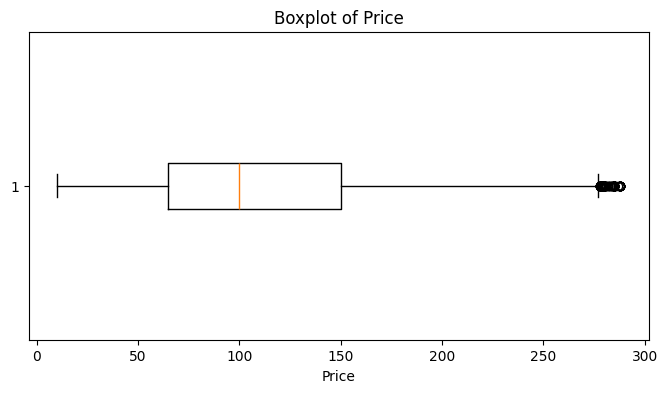

In [60]:
plt.figure(figsize=(8, 4))
plt.boxplot(df['price'], vert=False)
plt.title('Boxplot of Price')
plt.xlabel('Price')
plt.show()

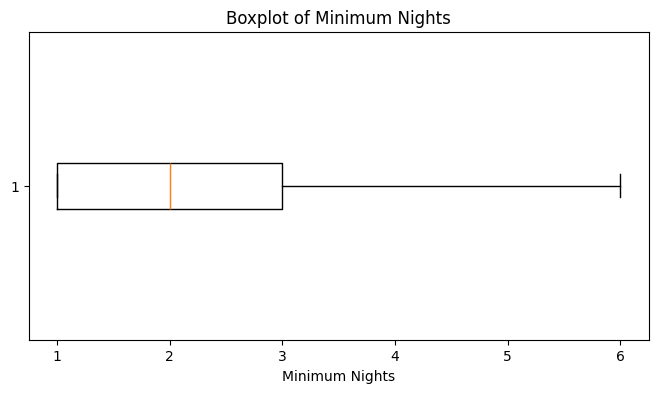

In [61]:
plt.figure(figsize=(8, 4))
plt.boxplot(df['minimum_nights'], vert=False)
plt.title('Boxplot of Minimum Nights')
plt.xlabel('Minimum Nights')
plt.show()

## Feature Engineering

In [62]:
# extracting features like year and month from last_review column

df['review_year'] = df['last_review'].dt.year.fillna(0).astype(int)
df['review_month'] = df['last_review'].dt.month.fillna(0).astype(int)

In [63]:
# Price categories for aggregation
df['price_category'] = pd.cut(
    df['price'],
    bins=[0, 50, 150, 300, 600, 10000],
    labels=['Budget', 'Standard', 'Premium', 'Luxury', 'Elite']
)


In [64]:
# creating host_type column based on calculated_host_listings_count

def get_host_type(listing_count):
    if listing_count <= 2:
        return "Individual"
    elif listing_count <= 10:
        return "Superhost"
    else:
        return "Business"

df['host_type'] = df['calculated_host_listings_count'].apply(get_host_type)


In [65]:
df['reviews_per_year'] = (df['reviews_per_month'] * 12).round(2)

In [66]:
df['monthly_availability'] = (df['availability_365'] / 12).round(2)


In [67]:
# Popular Neighborhoods and Property Types

neighbourhood_group = (
    df.groupby('neighbourhood_group')['id']
      .count()
      .reset_index()
      .rename(columns={'neighbourhood_group': 'Neighbourhood Group', 'id': 'Total Listings'})
      .sort_values(by='Total Listings', ascending=False)
)

neighbourhood_group

,Neighbourhood Group,Total Listings
1,Brooklyn,15829
2,Manhattan,14135
3,Queens,4730
0,Bronx,965
4,Staten Island,327


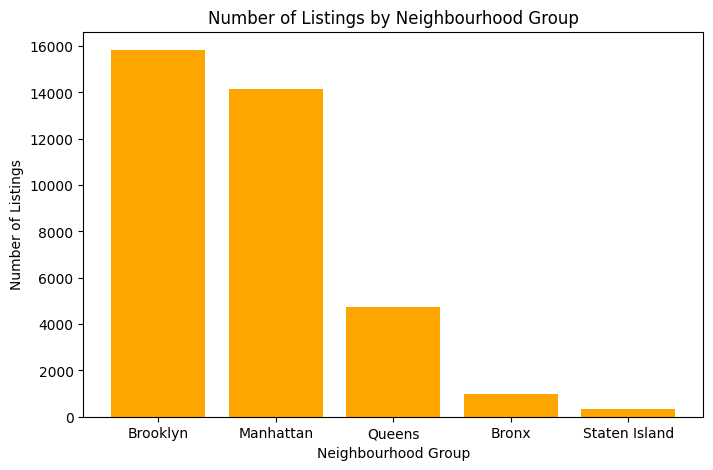

In [68]:
plt.figure(figsize=(8, 5))
plt.bar(neighbourhood_group['Neighbourhood Group'], neighbourhood_group['Total Listings'], color='orange')
plt.title('Number of Listings by Neighbourhood Group')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Number of Listings')
plt.show()

In [69]:
room_type = df.groupby('room_type')['id'].count().reset_index()
room_type.columns = ['Room Type', 'Total Listings']
room_type

,Room Type,Total Listings
0,Entire home/apt,16534
1,Private room,18515
2,Shared room,937


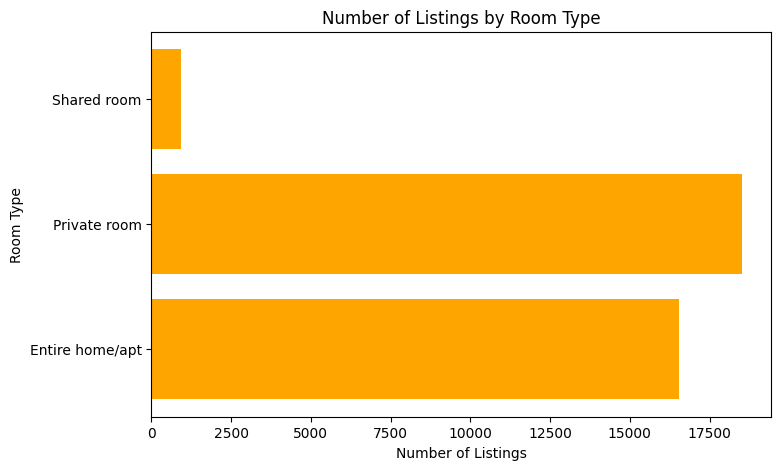

In [70]:
plt.figure(figsize=(8, 5))
plt.barh(room_type['Room Type'], room_type['Total Listings'], color='orange')
plt.title('Number of Listings by Room Type')
plt.xlabel('Number of Listings')
plt.ylabel('Room Type')
plt.show()




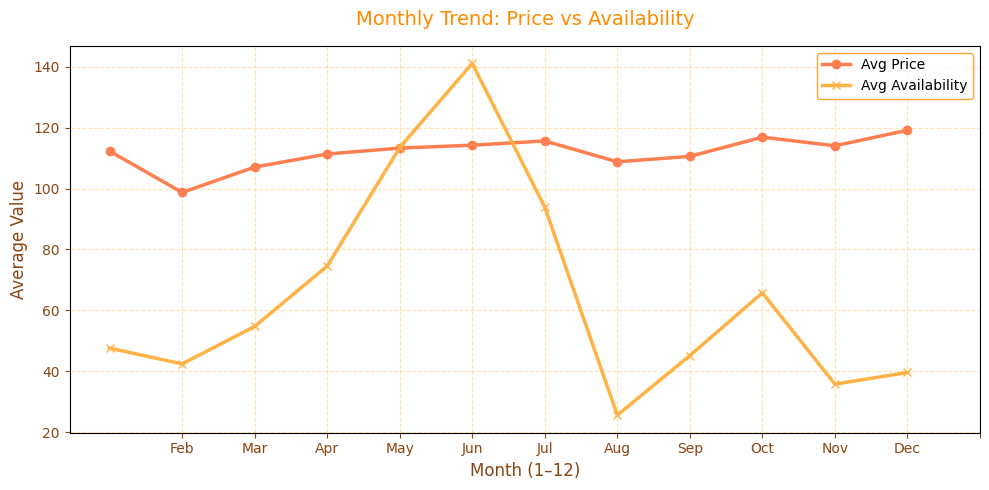

In [71]:
# Seasonal Trend in Availability or Prices

monthly_data = df[df['review_month'] != 0].groupby('review_month')[['price', 'availability_365']].mean()


monthly_data.index = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

plt.figure(figsize=(10, 5))
plt.plot(monthly_data.index, monthly_data['price'], color='#FF7F50', marker='o', linewidth=2.5, label='Avg Price')
plt.plot(monthly_data.index, monthly_data['availability_365'], color='#FFB347', marker='x', linewidth=2.5, label='Avg Availability')

plt.title('Monthly Trend: Price vs Availability', fontsize=14, color='darkorange', pad=15)
plt.xlabel('Month (1–12)', fontsize=12, color='saddlebrown')
plt.ylabel('Average Value', fontsize=12, color='saddlebrown')
plt.grid(alpha=0.3, linestyle='--', color='orange')
plt.legend(facecolor='white', edgecolor='darkorange', fontsize=10)
plt.tick_params(colors='saddlebrown')
plt.xticks(range(1, 13))
plt.tight_layout()
plt.show()

## Export Cleaned Dataset

In [117]:
airbnb_db = df

In [128]:
# username = "postgres"        # e.g., 'postgres'
# password = urllib.parse.quote_plus("Sandy@1234")        # e.g., 'admin123'
# host = "localhost"                # or your server IP
# port = "5432"                     # default PostgreSQL port
# database = "airbnb_listings"   # e.g., 'airbnb_db'

In [129]:
# Load environment variables from .env file
load_dotenv()

True

In [130]:
# Fetch variables
username = os.getenv("DB_USERNAME")
password = urllib.parse.quote_plus(os.getenv("DB_PASSWORD"))
host = os.getenv("DB_HOST")
port = os.getenv("DB_PORT")
database = os.getenv("DB_NAME")

In [131]:
engine = create_engine(f"postgresql+psycopg2://{username}:{password}@{host}:{port}/{database}")

In [132]:
table_name = "airbnb_listings"

In [133]:
# if the table exists, replace it. options: 'fail', 'replace', 'append'
airbnb_db.to_sql(table_name, engine, index=False, if_exists='replace')

print(f"✅ DataFrame exported successfully to PostgreSQL table: {table_name}")

✅ DataFrame exported successfully to PostgreSQL table: airbnb_listings
